---
title: "Day-14 Data Analysis Process & Review"
categories:
- Python
- Lecture
output:
 html_document:
   keep_md: true
date: '2022-07-06'
---

## 데이터분석(머신러닝, 딥러닝) 프로세스
- 데이터 불러오기
  - csv,MySQL, PostgreSQL, 클라우드DB연동
- 탐색적 자료분석
  - 데이터 전처리 및 가공
- 잠정적인 컬럼의 갯수를 지정
- 머신러닝 모델(통계 모델링, t.test, 분산분석, 교차분석)
- 머신러닝 모델의 경우 배포
  - JSP-Spring 웹개발
- 통계 모델링 경우, p-value 값 기준으로, 귀무가설 및 대립가설 검정
- (공통)결과 보고서를 작성
  - PPT, 보고서 작성

# 그래프 복습
- 수치형 데이터 시각화
- 범주형 데이터 시각화
- 데이터 관계 시각화
- matplotlib 라이브러리 방법 (복잡)
- seaborn 라이브러리 방법 (단순)
  - 복잡한 그래프 --> matplotlib
  - 쉬운 그래프 --> seaborn

## 수치형 데이터 시각화 

In [ ]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
#titanic.head()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


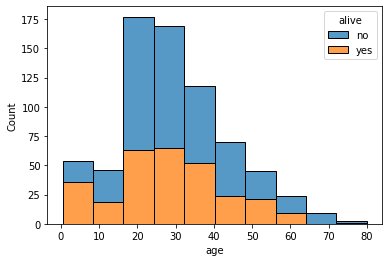

In [ ]:
# 히스토그램
sns.histplot(data = titanic, x = 'age', bins = 10, hue = 'alive', multiple='stack')
# hue = 다른 변수로 그래프 추가
# stack = 색 채우기

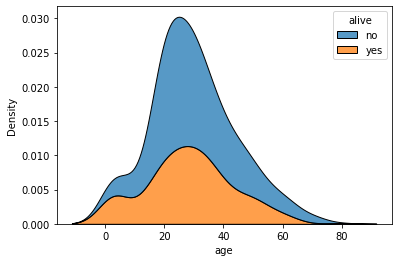

In [ ]:
# 커널밀도추정 함수 그래프
# 연속형 데이터 1개만 쓸 때 사용
# 분포
sns.kdeplot(data=titanic, x='age', hue = 'alive', multiple = 'stack')
# hue = 다른 변수로 그래프 추가
# stack = 색 채우기

### 분포도 
- 수치형 데이터 한개 컬럼의 분포를 나타내는 그래프
- 정규분포인가
  - 평균을 기준으로 좌우 대칭

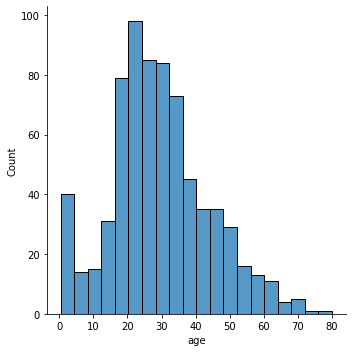

In [ ]:
sns.displot(data=titanic,x='age')

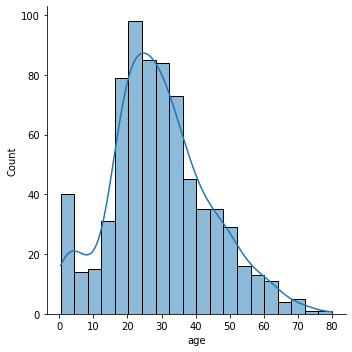

In [ ]:
sns.displot(data=titanic,x='age', kde = True)
# 두개의 그래프가 같이 나온다

## 범주형 데이터 시각화
- x축 범주형, y축 수치데이터
- x축 범주형, y축 범주형
  - 히트맵


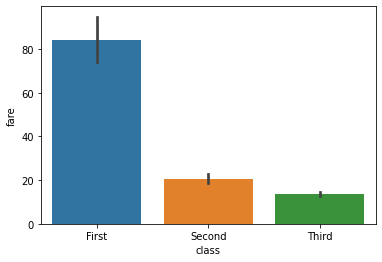

In [ ]:
# 막대그래프
sns.barplot(x='class', y='fare', data=titanic)
# 그래프의 맨 꼭대기가 평균값이다
# error bar = 오차막대 
# 샘플을 구해서 그래프를 그리기 때문에 오차가 생긴다

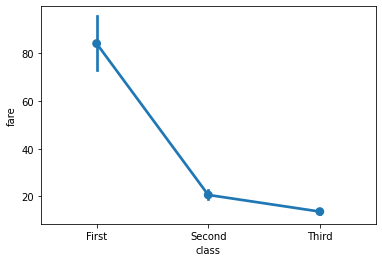

In [ ]:
# 포인트 플롯
sns.pointplot(x='class', y='fare', data= titanic)

### boxplot
- 제 1사분위 : 전체 데이터 중에 하위 25%
- 사분위 범위 수(IQR) : 제 3사분위 - 제 1사분위
- 최댓값 : 제 3사분위 +(1.5xIQR)
- 최댓값보다 크고 최솟값보다 작은 값들은 이상치

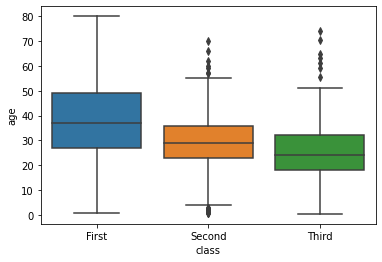

In [ ]:
# boxplot
sns.boxplot(x='class', y='age', data=titanic)

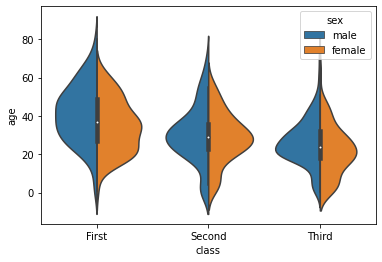

In [ ]:
# 바이올린 플롯
sns.violinplot(x='class', y='age', hue='sex', data=titanic, split=True)

### countplot
- 범주형 데이터의 갯수 확인 

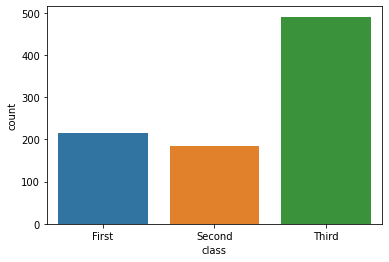

In [ ]:
sns.countplot(x='class', data=titanic)

## 데이터 관계 시각화
- 여러 데이터 사이의 관계도를 파악하기 위한 그래프 

### 히트맵 

In [ ]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


- 각 연도별, 월별 승객수 

In [ ]:
# pivot테이블
import pandas as pd
flights_pivot =flights.pivot(index = 'year', columns = 'month', values = 'passengers')
print(flights_pivot)

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201
1954   204  188  235  227  234  264  302  293  259  229  203  229
1955   242  233  267  269  270  315  364  347  312  274  237  278
1956   284  277  317  313  318  374  413  405  355  306  271  306
1957   315  301  356  348  355  422  465  467  404  347  305  336
1958   340  318  362  348  363  435  491  505  404  359  310  337
1959   360  342  406  396  420  472  548  559  463  407  362  405
1960   417  391  419  461  472  535  622  606  508  461  390  432


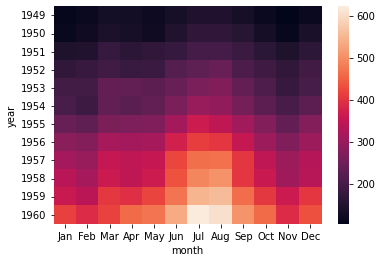

In [ ]:
# 히트맵
sns.heatmap(data = flights_pivot)

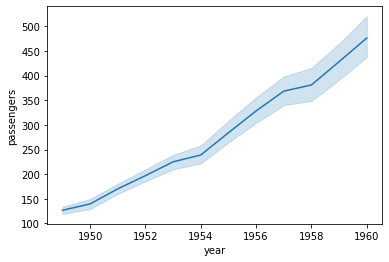

In [ ]:
# 라인플롯
sns.lineplot(x='year', y='passengers', data=flights)
# 평균과 신뢰구간이 생긴다 

In [ ]:
# 산점도
tips = sns.load_dataset('tips')
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


- 두개의 연속된 데이터
  - total_bill, tip

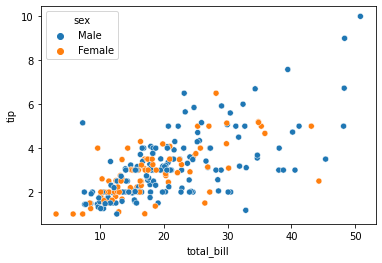

In [ ]:
sns.scatterplot(x='total_bill', y='tip', hue='sex',data = tips)
# hue를 기준으로 분리

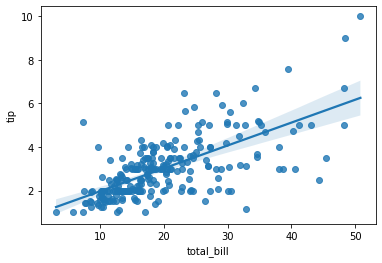

In [ ]:
# 회귀선
sns.regplot(x='total_bill', y='tip',data = tips)

# 머신러닝 복습
- 현재 가장 인기있는 모델
  - LightGBM, XGBoost 

## 선형회귀
- 선형회귀식을 찾는 것이 중요
- $y = 3x+4$에 근사한 데이터 50개 생성

In [ ]:
import numpy as np 
import pandas as pd

# 시드값 고정 
np.random.seed(0)
intercept = 4 # 절편, 상수
slope = 3 # 기울기

# 변동성 주기 위해 노이즈 생성
noise = np.random.randn(50, 1)
x = 5 * np.random.rand(50, 1) # 0과 5사이의 실숫값 50개 생성
y = slope * x + intercept + noise

# 데이터 프레임 생성
data = pd.DataFrame({'X' : x[:, 0], 'Y' : y[:, 0]})
print(data)

           X          Y
0   0.794848   8.148596
1   0.551876   6.055784
2   3.281648  14.823682
3   0.690915   8.313637
4   0.982912   8.816293
5   1.843626   8.553600
6   4.104966  17.264987
7   0.485506   5.305162
8   4.189725  16.465955
9   0.480492   5.852075
10  4.882297  18.790936
11  2.343256  12.484042
12  4.883805  19.412454
13  3.024228  13.194358
14  3.696318  15.532817
15  0.195939   4.921491
16  1.414035   9.736184
17  0.600983   5.597790
18  1.480701   8.755171
19  0.593639   4.926820
20  1.589916   6.216758
21  2.071315  10.867564
22  0.320737   5.826649
23  3.462361  13.644917
24  2.833007  14.768776
25  1.326947   6.526477
26  2.616240  11.894479
27  0.469703   5.221924
28  2.879732  14.171977
29  4.646481  19.408802
30  1.592845   8.933482
31  3.337052  14.389318
32  0.658989   5.089182
33  3.581636  12.764112
34  1.447030   7.993179
35  0.915957   6.904219
36  2.932565  14.027985
37  0.100538   5.503993
38  4.144700  16.046774
39  0.023477   3.768129
40  3.389083  13

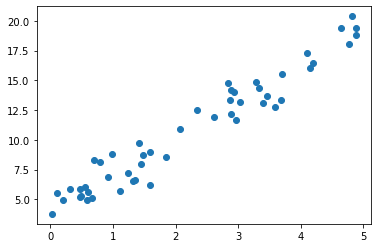

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data["X"], data["Y"])
plt.show()

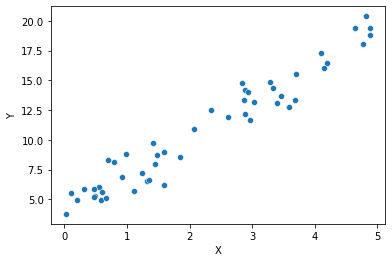

In [ ]:
import seaborn as sns
sns.scatterplot(x='X', y='Y', data = data)

### 선형 회귀 모형 훈련
- 모형 생성 후, 회귀계수 3과 y절편 4에 근사한 값이 나와야 함 

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x,y)

print('y절편:', lr_model.intercept_)
print('회귀계수', lr_model.coef_)

y절편: [4.05757639]
회귀계수 [[3.03754061]]


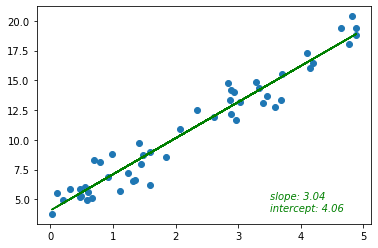

In [ ]:
# 예측값
y_pred = lr_model.predict(x)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, y_pred, color='green')

# slope, intercept 
label = 'slope: {}\nintercept: {}'.format(round(lr_model.coef_[0][0], 2), round(lr_model.intercept_[0], 2))
ax.text(3.5, 4, label, style ='italic', 
        fontsize = 10, color ="green")
plt.show()

## 로지스틱 회귀
- 

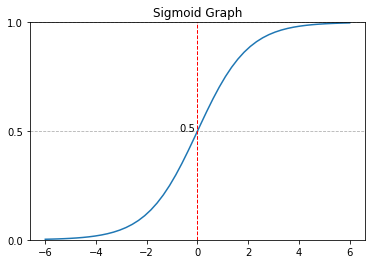

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(arr, scale=1):
    arr = np.asarray(arr)
    result = 1/(1 + np.exp(-arr*scale))
    return result

x = np.linspace(-6, 6)
y = sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid(which='major', axis='y', linestyle='--')
ax.axvline(x=0, color='r', linestyle='--', linewidth=1)
ax.set_ylim(0,1)
ax.set_yticks([0, 1, 0.5])
ax.text(0-0.1, 0.5, '0.5', ha='right')
ax.set_title('Sigmoid Graph')
plt.show()

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 가져오기
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# 모델 생성 및 학습
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [ ]:
# 모형 평가 
p_pred = model.predict_proba(x)
print('p_pred', p_pred, sep='\n')

p_pred
[[0.97979027 0.02020973]
 [0.94958202 0.05041798]
 [0.87976149 0.12023851]
 [0.73975066 0.26024934]
 [0.52477284 0.47522716]
 [0.30020373 0.69979627]
 [0.1428487  0.8571513 ]
 [0.06080627 0.93919373]
 [0.02453462 0.97546538]
 [0.00967652 0.99032348]]


In [ ]:
y_pred = model.predict(x)
print('y_pred',y_pred)

y_pred [0 0 0 0 0 1 1 1 1 1]


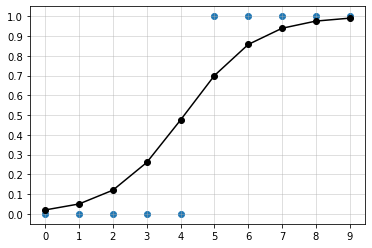

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, p_pred[:, 1], color = 'black',  marker='o', markersize=6)
ax.plot()

ax.set_xticks(x)
ax.set_yticks(np.arange(0, 1.1, 0.1))

ax.grid(which='major', alpha=0.5)
plt.show()
# 1.0 = 양성
# 0.0 = 음성
# 검은선 = 확률값
# class로 분류

In [ ]:
conf_m = confusion_matrix(y,y_pred)
print(conf_m)

[[5 0]
 [0 5]]


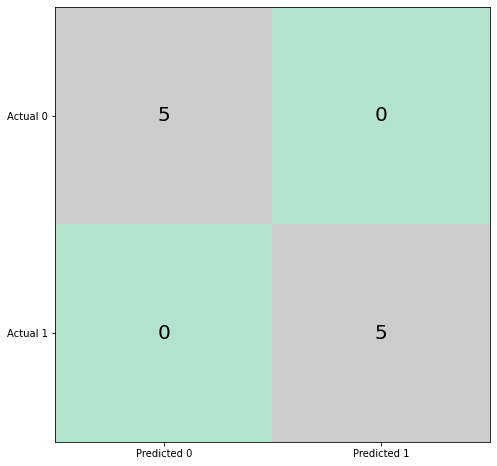

In [ ]:
cm = confusion_matrix(y, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap = 'Pastel2')
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=20)
plt.show()

## 결정 트리
- 분류와 회귀 문제에 모두 사용가능 

### 작동 원리
  + 데이터를 가장 잘 구분하는 조건을 정함.
  + 조건을 기준으로 데이터를 두 범주로 나눔
  + 나뉜 각 범주의 데이터를 구분하는 조건을 정함
  + 각 조건을 기준으로 데이터를 두 범주로 나눔
  + 언제까지 계속 분할할지 정한 후, 최종 결정 값을 구함.
- 불순도(Impurity)
  + 한 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지 나타냄
  + 흰색과 검은색이 50:50으로 섞여 있다. (불순도 최대)
  + 흰색과 검은색으로 완전 분리 되었다. (불순도 최소)
- 엔트로피(Entropy)
  + 불확실한 정도를 의미함. 0 ~ 1로 정함.
  + 흰색과 검은색이 50:50으로 섞여 있다. 엔트로피 1
  + 흰색과 검은색으로 완전 분리 되었다. 엔트로피 0
- 정보이득(Information Gain)
  + 1에서 엔트로피를 뺀 수치
  + 정보 이득을 최대화하는 방향(엔트로피를 최소화 하는 방향)으로 노드를 분할함
- 지니 불순도(Gini Impurity)
  + 지니 불순도 값이 클수록 불순도도 높고, 작을수록 불순도도 낮음. 엔트로피와 마찬가지로 지니 불순도가 낮아지는 방향으로 노드 분할함.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
import seaborn as sns 

# tips 데이터셋 
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- survived의 비율을 구한다
  - 0 : 사망자
  - 1 : 생존자

In [ ]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
# 데이터 추출
X = titanic[['pclass', 'parch', 'fare']] # 숫자로만 이루어진 컬럼
y = titanic['survived']

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 3), (268, 3), (623,), (268,))

In [ ]:
# 모델훈련 
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

acc = tree_model.score(X_test, y_test)
print(f'모형 정확도 : {acc:.3f}') # 정확도 측정

모형 정확도 : 0.675


## 랜덤포레스트 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
import seaborn as sns 

# tips 데이터셋 
titanic = sns.load_dataset('titanic')

X = titanic[['pclass', 'parch', 'fare']]
y = titanic['survived']

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state=42)

# 모델 훈련
rf_model = RandomForestClassifier(random_state=42) # 랜덤 포레스트 정의
rf_model.fit(X_train, y_train)

acc = rf_model.score(X_test, y_test)
print(f'모형 정확도 : {acc:.3f}') # 정확도 측정

모형 정확도 : 0.675


# XGBoost & LightGBM
- 전통적인 머신러닝 알고리즘의 융합
  - 선형회귀 릿지 라쏘, 과적합 방지 위한 규제
  - 결정 트리의 핵심 알고리즘
  - 경사 하강법
  - 부스팅 기법
- 문제점 : 파라미터의 갯수가 매우 많음.
- 많이 쓰는 이유 
  - 지금까지 나온 알고리즘보다
  - 모델 학습 속도가 빠르다
  - 성능이 좋다
- 큰회사들이 개발
  - 첫 옵션 
    - 우리가 자체적으로 배포하자 -> Python Wrapper API
  - 두번째 옵션
    - 파이썬 머신러닝 = Scikit-Learn에서 쉽게 쓸 수 있도록 개발 -> Scikit-Learn Wrapper API

   

## XGBoost Python Wrapper 방식 
- 각 모듈에 맞도록 행렬을 재변환 

In [97]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import seaborn as sns

#titanic
titanic = sns.load_dataset("titanic")
#titanic.info()

# X 독립변수, y 종속변수
X = titanic[['pclass', 'parch', 'fare']]
y = titanic['survived']

# 훈련데이터 테스트데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X,y,stratify=y,test_size=0.3,random_state=42
)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 3), (268, 3), (623,), (268,))

- Python Wrapper 방식구분

In [99]:
dtrain = xgb.DMatrix(data=X_train,label = y_train)
dtest = xgb.DMatrix(data=X_test, label = y_test)

print(dtrain)

- 머신러닝 코드

In [113]:
params = {
    'max_depth' : 3, 
    'n_estimators' : 100,
    'eta' : 0.1,
    'objective' : 'binary:logistic'  # 훈련목표 지정(분류, 회귀)
}
num_rounts = 400

w_list = [(dtrain,'train'),(dtest,'test')]
xgb_ml = xgb.train(params = params, 
                   dtrain = dtrain, 
                   num_boost_round = 400,
                   early_stopping_rounds = 100,
                   evals = w_list)

[0]	train-error:0.260032	test-error:0.302239
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 100 rounds.
[1]	train-error:0.260032	test-error:0.302239
[2]	train-error:0.260032	test-error:0.302239
[3]	train-error:0.260032	test-error:0.302239
[4]	train-error:0.260032	test-error:0.302239
[5]	train-error:0.260032	test-error:0.302239
[6]	train-error:0.260032	test-error:0.302239
[7]	train-error:0.260032	test-error:0.302239
[8]	train-error:0.260032	test-error:0.302239
[9]	train-error:0.260032	test-error:0.302239
[10]	train-error:0.260032	test-error:0.302239
[11]	train-error:0.260032	test-error:0.302239
[12]	train-error:0.260032	test-error:0.302239
[13]	train-error:0.247191	test-error:0.298507
[14]	train-error:0.247191	test-error:0.298507
[15]	train-error:0.248796	test-error:0.302239
[16]	train-error:0.248796	test-error:0.302239
[17]	train-error:0.248796	test-error:0.302239
[18]	train-error:0.248796	test-error

In [114]:
# 평가 
from sklearn.metrics import accuracy_score
pred_probs = xgb_ml.predict(dtest)
y_pred = [1 if x > 0.5 else 0 for x in pred_probs]

# 예측라벨과 실제라벨 사이의 정확도 측정
accuracy_score(y_pred, y_test)

0.6865671641791045

## XGBoost Scikit_Learn API 방식

In [119]:
from xgboost import XGBClassifier # API

xgb_model = XGBClassifier(objectiv ='binary:logistic',
                          n_estimators=100,
                          max_depth=3,
                          learning_rate=0.1,
                          rum_rounds = 400,
                          random_state=42)
w_list = [(X_train, y_train),(X_test, y_test)
]
xgb_model.fit(X_train, y_train, eval_set=w_list,eval_metric='error', verbose=True)

y_probas = xgb_model.predict_proba(X_test)
y_pred = [1 if x > 0.5 else 0 for x in pred_probs]

# 예측라벨과 실제라벨 사이의 정확도 측정
accuracy_score(y_pred, y_test)

[0]	validation_0-error:0.260032	validation_1-error:0.302239
[1]	validation_0-error:0.260032	validation_1-error:0.302239
[2]	validation_0-error:0.260032	validation_1-error:0.302239
[3]	validation_0-error:0.260032	validation_1-error:0.302239
[4]	validation_0-error:0.260032	validation_1-error:0.302239
[5]	validation_0-error:0.260032	validation_1-error:0.302239
[6]	validation_0-error:0.260032	validation_1-error:0.302239
[7]	validation_0-error:0.260032	validation_1-error:0.302239
[8]	validation_0-error:0.260032	validation_1-error:0.302239
[9]	validation_0-error:0.260032	validation_1-error:0.302239
[10]	validation_0-error:0.260032	validation_1-error:0.302239
[11]	validation_0-error:0.260032	validation_1-error:0.302239
[12]	validation_0-error:0.260032	validation_1-error:0.302239
[13]	validation_0-error:0.247191	validation_1-error:0.298507
[14]	validation_0-error:0.247191	validation_1-error:0.298507
[15]	validation_0-error:0.248796	validation_1-error:0.302239
[16]	validation_0-error:0.248796	v

0.6865671641791045

## LightGBM Python Wrapper 방식 

In [121]:
import lightgbm as lgb 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
import seaborn as sns 

# tips 데이터셋 
titanic = sns.load_dataset('titanic')

X = titanic[['pclass', 'parch', 'fare']]
y = titanic['survived']

# 훈련데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state=42)

# XGBoost 코드와 유사하다. 
dtrain = lgb.Dataset(data = X_train, label = y_train)
dtest = lgb.Dataset(data = X_test, label = y_test)

params = {'max_depth':3,
          'n_estimators':100,
          'learning_rate': 0.1,
          'objective':'binary',
          'metric' : 'binary_error', 
          'num_boost_round' : 400, 
          'verbose' : 1} 

w_list = [dtrain, dtest]
lgb_ml = lgb.train(params=params, train_set = dtrain,\
                  early_stopping_rounds=100, valid_sets= w_list)

pred_probs = lgb_ml.predict(X_test)
y_pred=[1 if x > 0.5 else 0 for x in pred_probs]

# 예측 라벨과 실제 라벨 사이의 정확도 측정
accuracy_score(y_pred, y_test)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
[3]	training's binary_error: 0.354735	valid_1's binary_error: 0.369403
[4]	training's binary_error: 0.29695	valid_1's binary_error: 0.354478
[5]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[6]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[7]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[8]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[9]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[10]	training's binary_error: 0.269663	valid_1's binary_error: 0.309701
[11]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[12]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[13]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[14]	training

0.6940298507462687

## LightGBM Scikit_Learn API 방식

In [122]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# model 
w_list = [dtrain, dtest]
model = LGBMClassifier(objective = 'binary', 
                       metric = 'binary_error',
                       n_estimators=100, 
                       learning_rate=0.1, 
                       max_depth=3, 
                       num_boost_round = 400,
                       random_state = 32)
model.fit(X_train, 
          y_train, 
          eval_set = [(X_train, y_train), (X_test, y_test)], 
          verbose=1,
          early_stopping_rounds = 100)
y_probas = model.predict_proba(X_test) 
y_pred=[1 if x > 0.5 else 0 for x in y_probas[:, 1]] # 예측 라벨(0과 1로 예측)

# 예측 라벨과 실제 라벨 사이의 정확도 측정
accuracy_score(y_pred, y_test)

[1]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_error: 0.383628	valid_1's binary_error: 0.384328
[3]	training's binary_error: 0.354735	valid_1's binary_error: 0.369403
[4]	training's binary_error: 0.29695	valid_1's binary_error: 0.354478
[5]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[6]	training's binary_error: 0.272873	valid_1's binary_error: 0.33209
[7]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[8]	training's binary_error: 0.269663	valid_1's binary_error: 0.317164
[9]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[10]	training's binary_error: 0.269663	valid_1's binary_error: 0.309701
[11]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[12]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[13]	training's binary_error: 0.264848	valid_1's binary_error: 0.309701
[14]	training

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


0.6940298507462687